In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime as dt
from IPython.display import Image
from sklearn.model_selection import train_test_split
%matplotlib inline

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10, 7)

In [2]:
T = 10
HORIZON = 3
dateColumn = "Date" # Also "Date"
dateFormat = "%Y-%m-%d" # Also "%Y-%m-%d"

In [3]:
data = pd.read_csv("../common/data.csv")
data["Close"] = data["Adj Close"]
data.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis = 1, inplace = True)

data[dateColumn] = data[dateColumn].apply(lambda x: x[:-6])
data[dateColumn] = pd.to_datetime(data[dateColumn], format = dateFormat)

In [4]:
data.head()

,Date,Close
0,1980-01-01,0.10
1,1980-01-01,0.10
2,1980-01-01,0.09
3,1980-01-01,0.09
4,1980-01-01,0.09


In [5]:
dataShifted = data.copy()

for t in range(1, HORIZON + 1):
    dataShifted["y_t + " + str(t)] = dataShifted["Close"].shift(-t)
dataShifted.head(10)

,Date,Close,y_t + 1,y_t + 2,y_t + 3
0,1980-01-01,0.10,0.10,0.09,0.09
1,1980-01-01,0.10,0.09,0.09,0.09
2,1980-01-01,0.09,0.09,0.09,0.10
3,1980-01-01,0.09,0.09,0.10,0.10
4,1980-01-01,0.09,0.10,0.10,0.11
5,1980-01-01,0.10,0.10,0.11,0.11
6,1980-01-01,0.10,0.11,0.11,0.12
7,1980-01-01,0.11,0.11,0.12,0.13
8,1980-01-01,0.11,0.12,0.13,0.12
9,1980-01-01,0.12,0.13,0.12,0.12


In [6]:
for t in range(1, T + 1):
    dataShifted["Close_t - " + str(T - t)] = dataShifted["Close"].shift(T - t)
dataShifted.head(10)
dataShifted = dataShifted.dropna(how = "any")
dataShifted.head(10)

,Date,Close,y_t + 1,y_t + 2,y_t + 3,Close_t - 9,Close_t - 8,Close_t - 7,Close_t - 6,Close_t - 5,Close_t - 4,Close_t - 3,Close_t - 2,Close_t - 1,Close_t - 0
9,1980-01-01,0.12,0.13,0.12,0.12,0.10,0.10,0.09,0.09,0.09,0.10,0.10,0.11,0.11,0.12
10,1980-01-01,0.13,0.12,0.12,0.12,0.10,0.09,0.09,0.09,0.10,0.10,0.11,0.11,0.12,0.13
11,1980-01-01,0.12,0.12,0.12,0.12,0.09,0.09,0.09,0.10,0.10,0.11,0.11,0.12,0.13,0.12
12,1980-01-01,0.12,0.12,0.12,0.11,0.09,0.09,0.10,0.10,0.11,0.11,0.12,0.13,0.12,0.12
13,1981-01-01,0.12,0.12,0.11,0.11,0.09,0.10,0.10,0.11,0.11,0.12,0.13,0.12,0.12,0.12
14,1981-01-01,0.12,0.11,0.11,0.11,0.10,0.10,0.11,0.11,0.12,0.13,0.12,0.12,0.12,0.12
15,1981-01-01,0.11,0.11,0.11,0.11,0.10,0.11,0.11,0.12,0.13,0.12,0.12,0.12,0.12,0.11
16,1981-01-01,0.11,0.11,0.11,0.11,0.11,0.11,0.12,0.13,0.12,0.12,0.12,0.12,0.11,0.11
17,1981-01-01,0.11,0.11,0.11,0.11,0.11,0.12,0.13,0.12,0.12,0.12,0.12,0.11,0.11,0.11
18,1981-01-01,0.11,0.11,0.11,0.11,0.12,0.13,0.12,0.12,0.12,0.12,0.11,0.11,0.11,0.11


In [7]:
Y = dataShifted[["y_t + " + str(t) for t in range(1, HORIZON + 1)]]
X = dataShifted[["Close_t - " + str(T - t) for t in range(1, T  +1)]]
X[dateColumn] = dataShifted[dateColumn]
print(X.shape, Y.shape)

(10219, 11) (10219, 3)


In [8]:
# Source: https://datascience.stackexchange.com/a/53161/117075
trainRatio = 0.75
validationRatio = 0.15
testRatio = 0.10

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 1 - trainRatio, shuffle = False)
xVal, xTest, yVal, yTest = train_test_split(
    xTest,
    yTest,
    test_size = testRatio / (testRatio + validationRatio),
    shuffle = False
)

xTestIndex = xTest[dateColumn]
dfs = [xTrain, xTest, xVal, yTrain, yTest, yVal]
for i, _ in enumerate(dfs):
    if i <= 2:
        dfs[i].drop([dateColumn], axis = 1, inplace = True)
    dfs[i] = dfs[i].to_numpy()
    if i <= 2:
        dfs[i] = dfs[i].reshape((dfs[i].shape[0], dfs[i].shape[1], 1))
xTrain, xTest, xVal, yTrain, yTest, yVal = dfs

In [9]:
print(xTrain.shape, yTrain.shape)

(7664, 10, 1) (7664, 3)


In [10]:
from keras.models import Model, Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [11]:
LATENT_DIM = 5
KERNEL_SIZE = 2
BATCH_SIZE = 32
EPOCHS = 10

In [12]:
model = Sequential()
model.add(GRU(LATENT_DIM, input_shape=(T, 1)))
model.add(Dense(HORIZON))
model.compile(optimizer = "RMSProp", loss = "mse")

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 5)                 120       
_________________________________________________________________
dense (Dense)                (None, 3)                 18        
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


In [14]:
earlyStop = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0,
    patience = 5
)

In [15]:
history = model.fit(
    xTrain,
    yTrain,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (xVal, yVal),
    callbacks = [earlyStop],
    verbose = 1
)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmp1ulgyvnj.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmp1ulgyvnj.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
240/240 [==============================] - 13s 5ms/step - loss: 4.0089 - val_loss: 394.9135
Epoch 2/10
240/240 [==============================] - 1s 3ms/step - loss: 2.4343 - val_loss: 356.7569
Epoch 3/10
240/240 [==============================] - 1s 3ms/step - loss: 1.4409 - val_loss: 319.5329
Epoch 4/10
240/240 [==============================] - 1s 3ms/step - loss: 0.8097 - val_lo

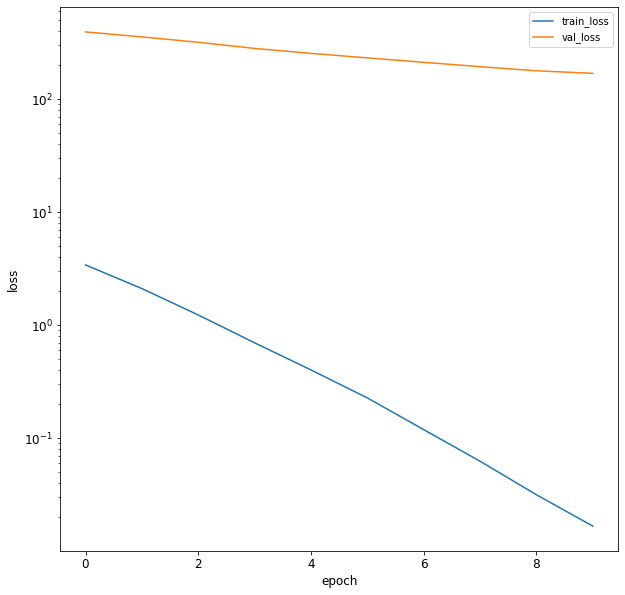

In [16]:
plotDf = pd.DataFrame.from_dict(
    {
        "train_loss" : history.history["loss"],
        "val_loss" : history.history["val_loss"]
    }
)
plotDf.plot(logy = True, figsize = (10, 10), fontsize = 12)
plt.xlabel("epoch", fontsize = 12)
plt.ylabel("loss", fontsize = 12)
plt.show()

In [17]:
def create_evaluation_df(predictions, xTestIndex, yTest, H):
    """Create a data frame for easy evaluation"""
    evalDf = pd.DataFrame(predictions, columns = ["t + " + str(t) for t in range(1, H + 1)])
    evalDf["timestamp"] = xTestIndex.values
    evalDf = pd.melt(evalDf, id_vars = "timestamp", value_name = "prediction", var_name = "h")
    evalDf["actual"] = np.transpose(yTest).ravel()
    return evalDf

In [18]:
predictions = model.predict(xTest)
evalDf = create_evaluation_df(predictions, xTestIndex, yTest, HORIZON)
evalDf.head(5)

,timestamp,h,prediction,actual
0,2017-01-01,t + 1,8.87,33.86
1,2017-01-01,t + 1,8.88,34.83
2,2017-01-01,t + 1,8.89,34.52
3,2017-01-01,t + 1,8.90,34.72
4,2017-01-01,t + 1,8.90,34.66


In [19]:
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error
)

def mape(a, b): 
    mask = (a != 0)
    return (np.fabs(a - b) / a)[mask].mean()

erorMetrics = {
    "R2 Score: " : r2_score,
    "Mean Absolute Error" : mean_absolute_error,
    "Mean Squared Error" : mean_squared_error,
    "Mean Absolute Percentage Error" : mape
}


for t in range(1, HORIZON + 1):
    print(f"Predicting {t} units of time ahead")
    for metric in erorMetrics:
        df = evalDf[(evalDf.h == "t + " + str(t))]["prediction"]
        score = erorMetrics[metric](yTest[:, t - 1], df)
        score = np.round(score, 3)
        print(f"{metric:31} - ", score)
    print("=" * 40, end = "\n\n\n")

Predicting 1 units of time ahead
R2 Score:                       -  -3.244
Mean Absolute Error             -  59.98
Mean Squared Error              -  4708.784
Mean Absolute Percentage Error  -  0.845


Predicting 2 units of time ahead
R2 Score:                       -  -3.197
Mean Absolute Error             -  59.669
Mean Squared Error              -  4675.472
Mean Absolute Percentage Error  -  0.838


Predicting 3 units of time ahead
R2 Score:                       -  -3.239
Mean Absolute Error             -  60.184
Mean Squared Error              -  4741.855
Mean Absolute Percentage Error  -  0.846




No handles with labels found to put in legend.


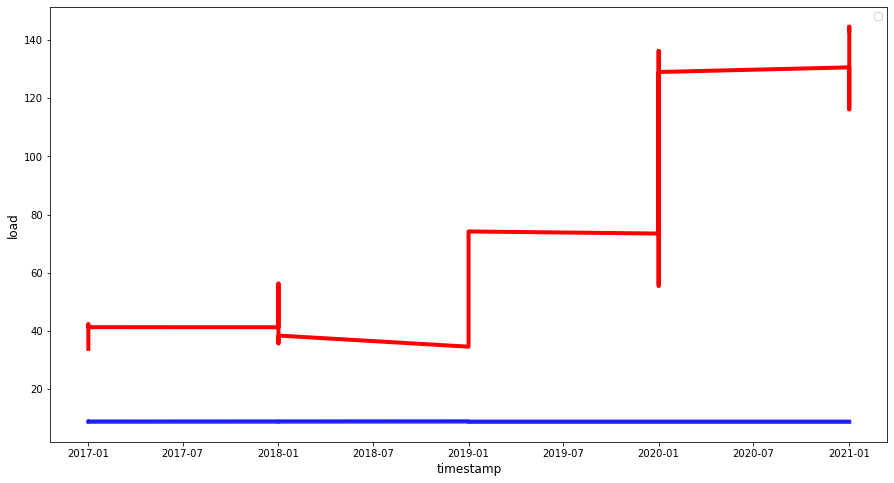

In [20]:
plotDf = evalDf[(evalDf.h == "t + 1")][["timestamp", "actual"]]
for t in range(1, HORIZON+1):
    plotDf["t + " + str(t)] = evalDf[(evalDf.h == "t + " + str(t))]["prediction"].values

fig = plt.figure(figsize = (15, 8))
ax = plt.plot(plotDf["timestamp"], plotDf["actual"], color = "red", linewidth = 4.0)
ax = fig.add_subplot(111)
ax.plot(plotDf["timestamp"], plotDf["t + 1"], color = "blue", linewidth = 4.0, alpha = 0.75)
ax.plot(plotDf["timestamp"], plotDf["t + 2"], color = "blue", linewidth = 3.0, alpha = 0.5)
ax.plot(plotDf["timestamp"], plotDf["t + 3"], color = "blue", linewidth = 2.0, alpha = 0.25)
plt.xlabel("timestamp", fontsize = 12)
plt.ylabel("load", fontsize = 12)
ax.legend(loc = "best")
plt.show()